# PYTHON can do the fft

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy as sp


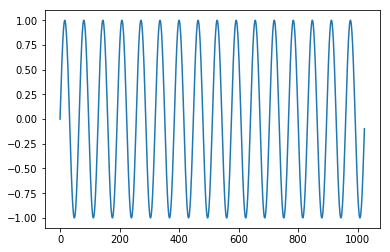

In [3]:
samp=[m.sin(x*2*m.pi/64)+0.0*m.sin(x*13*m.pi/64) for x in range(1024)]
plt.plot(samp)
plt.show()

In [7]:
bob=np.fft.rfft(samp)
len(np.fft.rfftfreq(1024,1/44100))

513

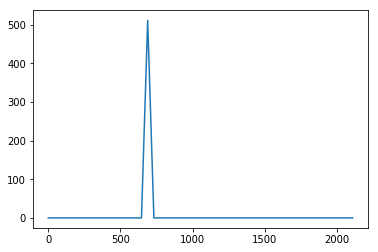

In [11]:
plt.plot(np.fft.rfftfreq(1024,1/44100)[0:50],abs(bob)[:50])
plt.show()

What happens when the data doesn't fit exactly?

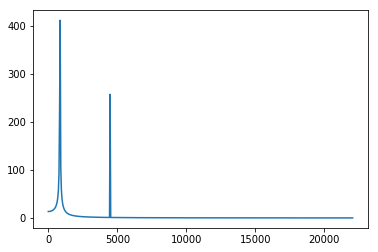

In [25]:
samp=[m.sin(x*2.456*m.pi/64)+0.5*m.sin(x*13*m.pi/64) for x in range(1024)]
bob=np.fft.rfft(samp)
plt.plot(np.fft.rfftfreq(1024,1/44100),abs(bob))
plt.show()

The signal spreads out, and falls in many 'buckets

apply a hamming window to the data

In [40]:
np.append([],[np.hamming(512)[:4],np.hamming(512)[-4:]])

array([ 0.08      ,  0.08003477,  0.08013909,  0.08031292,  0.08031292,
        0.08013909,  0.08003477,  0.08      ])

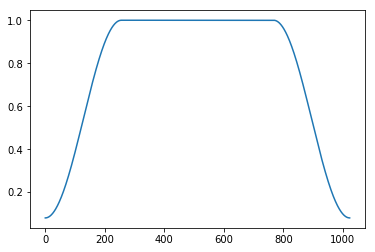

In [53]:
lotsofones=[1.0 for x in range(512)]

window=np.append([],np.hamming(512)[0:256])
window=np.append(window,lotsofones)
window=np.append(window,np.hamming(512)[256:])
#print(window)
plt.plot(window)
plt.show()

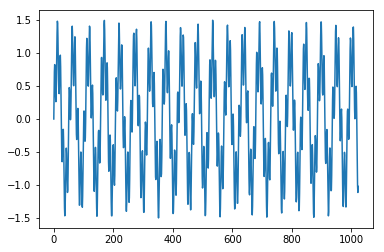

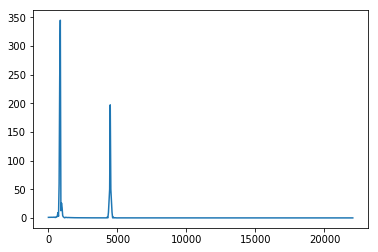

In [54]:
bob=np.fft.rfft([samp[ix]*window[ix] for ix in range(len(samp))])
plt.plot(samp)
plt.show()
plt.plot(np.fft.rfftfreq(1024,1/44100),abs(bob))
plt.show()

reconstruct the window with the inverse fft

In [55]:
rbob=np.fft.irfft(bob)

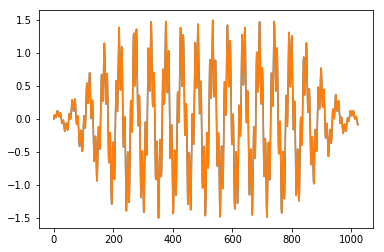

In [57]:
plt.plot(rbob)
plt.plot([rbob[ix] for ix in range(len(window))])
plt.show()

22050 [52 56 54 59 57] 212691


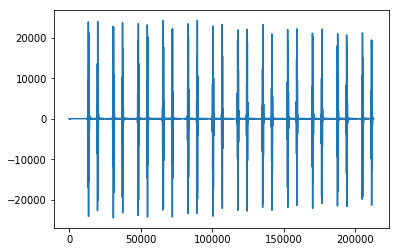

In [58]:
import scipy.io.wavfile
(rate,snd)=scipy.io.wavfile.read("hb1.wav")
print(rate,snd[0:5],len(snd))
plt.plot(snd)
plt.show()

In [89]:
rscale=int(len(snd)/17)
print("FFT size {}".format(rscale))
window=np.hamming(int(rscale))
fun=np.fft.rfft([snd[ix]*window[ix] for ix in range(int(rscale))])

FFT size 12511


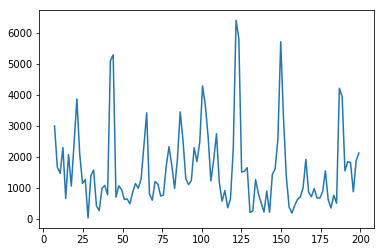

In [90]:
fmap=np.fft.rfftfreq(int(rscale),1/rate)
for nfpoints in range(len(fun)):
    if fmap[nfpoints]>= 200.0:
        break

plt.plot(fmap[4:nfpoints],abs(fun[4:nfpoints]))
plt.show()

In [91]:
funabs=abs(fun)
aloc=np.argwhere(funabs==max(funabs[4:]))[0][0]
print(aloc,fun[aloc])

69 (4704.92235463-4345.85536764j)


In [92]:
fmap[aloc]

121.60898409399726

In [100]:
bob=np.array([1,0,7,4,5,6,7,6,5,4,3,2,1,7,6,5,4,3,2,1])
np.argwhere(bob>0.2)

array([[ 0],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]], dtype=int32)

In [101]:
nabs = funabs/max(funabs)

In [104]:
 np.argwhere(nabs>0.2)

array([[0],
       [1]], dtype=int32)